In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [35]:
def labelEncoder(df, columns= [], target='', test_size=0.3, random_state=0, array=False, scalar=False):
    
    labelEncoder = LabelEncoder()

    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = labelEncoder.fit_transform(df[i].values)

    df_aux = df[columns].copy()

    if target != '':
        df[target] = df_aux[target] = df_aux[target].mask(df_aux[target] <= 8, 0)
        df[target] = df_aux[target] = df_aux[target].mask(df_aux[target] > 8, 1)
        df_aux.drop_duplicates(inplace=True)

        y = df_aux[[target]]
        x = df_aux.drop(target, axis=1)

        X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = test_size, random_state = random_state)

        if array:
            X_Train = X_Train.to_numpy()
            X_Test = X_Test.to_numpy()
            Y_Train = Y_Train.values.ravel()
            Y_Test = Y_Test.values.ravel()

        if scalar:
            scalar = StandardScaler()
            X_Train = scalar.fit_transform(X_Train)
            X_Test = scalar.transform(X_Test)

        return X_Train, X_Test, Y_Train, Y_Test
    
    else:
        df_aux.drop_duplicates(inplace=True)

        return df_aux


In [36]:
data = pd.read_csv('../datasets/hospitalizaciones_train.csv', index_col=False, header=0)

In [37]:
columns = ['Age','gender','Type of Admission','Severity of Illness', 'Insurance', 'Stay (in days)']
X_Train, X_Test, Y_Train, Y_Test = labelEncoder(data, columns, target='Stay (in days)', test_size=0.3, random_state=0, array=True, scalar=True)

In [38]:
model = LogisticRegression()
model.fit(X_Train, Y_Train)

LogisticRegression()

In [39]:
Y_Pred = model.predict(X_Test)

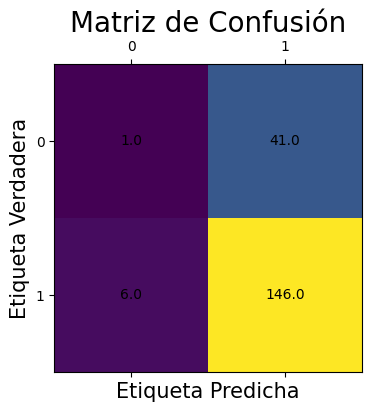

In [40]:
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(8,4))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [41]:
precision_score(Y_Test, Y_Pred)

0.7807486631016043